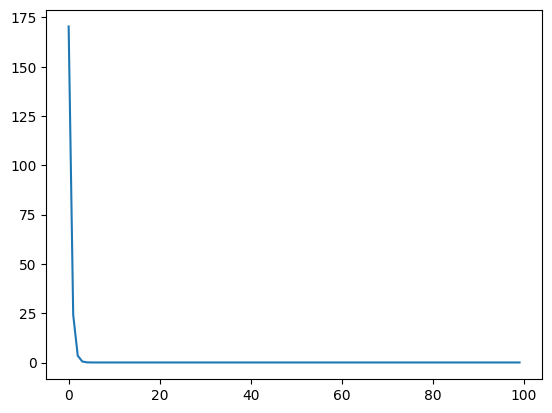

In [22]:
#Q1

import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])
b = torch.rand([1],requires_grad = True)
w = torch.rand([1],requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y[j] - y_p)**2
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad

    w.grad.zero_()
    b.grad.zero_()

plt.plot(loss_list)

W is -174.0 and B is-52.0
W is -170.20799255371094 and B is-50.85199737548828


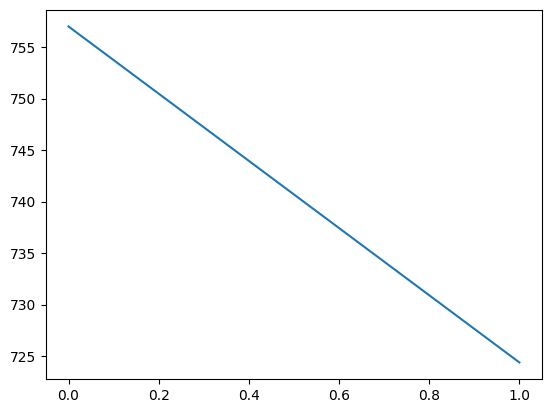

In [36]:
#Q2

import torch
import numpy as np
from torch.autograd import grad
import matplotlib.pyplot as plt

inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
b = torch.tensor(1.,requires_grad = True)
w = torch.tensor(1.,requires_grad = True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a + b
        loss += (y[j] - y_p)**2
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
        
    print(f"W is {w.grad} and B is{b.grad}")
    
    w.grad.zero_()
    b.grad.zero_()
 
plt.plot(loss_list)

After 0 epochs, The parameters are w=tensor([5.1880], requires_grad=True),b=tensor([0.5347], requires_grad=True), and loss =25583.306640625
After 10 epochs, The parameters are w=tensor([12.8205], requires_grad=True),b=tensor([1.0960], requires_grad=True), and loss =489.33154296875
After 20 epochs, The parameters are w=tensor([12.9189], requires_grad=True),b=tensor([1.1393], requires_grad=True), and loss =484.822021484375
After 30 epochs, The parameters are w=tensor([12.9177], requires_grad=True),b=tensor([1.1757], requires_grad=True), and loss =484.6885681152344
After 40 epochs, The parameters are w=tensor([12.9152], requires_grad=True),b=tensor([1.2119], requires_grad=True), and loss =484.55694580078125
After 50 epochs, The parameters are w=tensor([12.9127], requires_grad=True),b=tensor([1.2479], requires_grad=True), and loss =484.426513671875
After 60 epochs, The parameters are w=tensor([12.9103], requires_grad=True),b=tensor([1.2839], requires_grad=True), and loss =484.296630859375


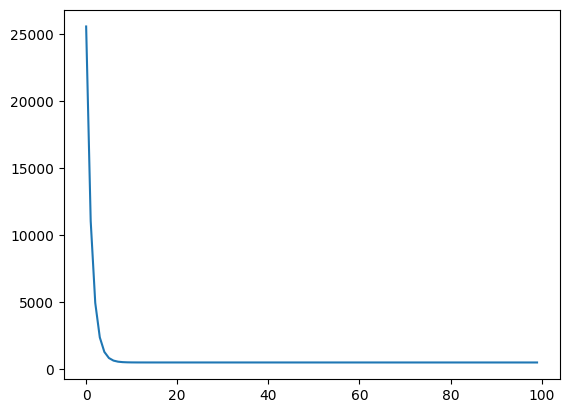

In [40]:
#Q3

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate = torch.tensor(0.001)

class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1],requires_grad = True)
        self.b = torch.rand([1],requires_grad = True)
    def forward(self,x):
        return self.w*x + self.b
    def update(self):
        self.w -= learning_rate*self.w.grad
        self.b -= learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj,y_p):
    return (yj - y_p)**2

model = RegressionModel()
loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j],y_p)
    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()Yi = β0 + β1Xi 

    with torch.no_grad():
        model.update()
    model.reset_grad()
    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

plt.plot(loss_list)

[tensor([12.,  7., 16., 20.]), tensor([180., 120., 210., 240.])]
[tensor([5.]), tensor([40.])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([14.7473], requires_grad=True),b=Parameter containing:
tensor([1.2820], requires_grad=True), and loss =362.4873352050781
After 10 epochs, The parameters are w=Parameter containing:
tensor([12.0014], requires_grad=True),b=Parameter containing:
tensor([1.4366], requires_grad=True), and loss =1291.016357421875
After 20 epochs, The parameters are w=Parameter containing:
tensor([13.2475], requires_grad=True),b=Parameter containing:
tensor([1.4333], requires_grad=True), and loss =78.39302062988281
After 30 epochs, The parameters are w=Parameter containing:
tensor([13.8093], requires_grad=True),b=Parameter containing:
tensor([1.6775], requires_grad=True), and loss =1914.47119140625
After 40 epochs, The parameters are w=Parameter containing:
tensor([13.8074], requires_grad=True),b=Parameter containing:
tensor([1.9417], requires_grad=Tr

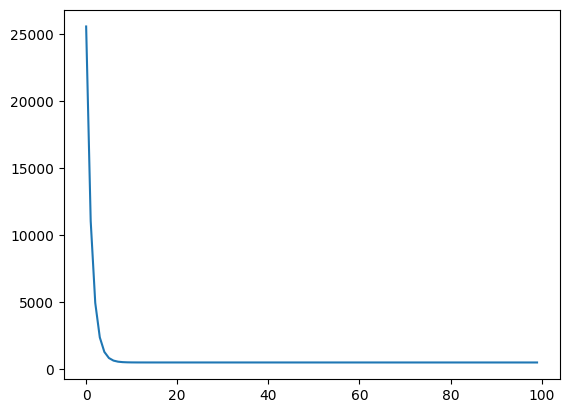

In [50]:
#Q4

import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([5.0,7.0,12.0,16.0,20.0])
y = torch.tensor([40.0,120.0,180.0,210.0,240.0])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=4,shuffle=True)

for data in iter(data_loader):
    print(data)
    
learning_rate = torch.tensor(0.001)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.003)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

plt.plot(loss_list)

In [47]:
#Q5

import torch
import numpy as np
from torch.autograd import Variable

x = Variable(torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]))
y = Variable(torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6]))

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = torch.nn.Linear(23, 23)
        
    def forward(self,x):
        return self.linear(x)

model = RegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

for epochs in range(100):
    pred_y = model(x)
    loss = criterion(pred_y, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epochs%10==0:
        print("After {} epochs, loss ={}".format(epochs,loss.item()))

After 0 epochs, loss =342.5619201660156
After 10 epochs, loss =1.2611750435098656e-06
After 20 epochs, loss =1.4631001488477069e-12
After 30 epochs, loss =7.117784551861905e-13
After 40 epochs, loss =7.117784551861905e-13
After 50 epochs, loss =7.117784551861905e-13
After 60 epochs, loss =7.117784551861905e-13
After 70 epochs, loss =7.117784551861905e-13
After 80 epochs, loss =7.117784551861905e-13
After 90 epochs, loss =7.117784551861905e-13


In [51]:
#Q6

import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X1,X2,Y):
        self.X1 = X1
        self.X2 = X2
        self.Y = Y
    def __len__(self):
        return len(self.X1)
    def __getitem__(self,idx):
        return self.X1[idx],self.X2[idx],self.Y[idx]

x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.5,3.5,2.5,11.5,5.7])
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset,batch_size=2,shuffle=True)

for data in iter(data_loader):
    print(data)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.w2 = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

loss_fn = torch.nn.MSELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,labels = data
        optimizer.zero_grad()
        outputs = model(x1,x2)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w1,model.w2,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

[tensor([4, 5]), tensor([5, 7]), tensor([3.5000, 2.5000])]
[tensor([2, 6]), tensor([1, 3]), tensor([ 5.7000, 11.5000])]
[tensor([3]), tensor([8]), tensor([-3.5000])]
After 0 epochs, The parameters are w=Parameter containing:
tensor([0.6802], requires_grad=True),b=Parameter containing:
tensor([0.4393], requires_grad=True), and loss =Parameter containing:
tensor([0.0293], requires_grad=True)
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.8790], requires_grad=True),b=Parameter containing:
tensor([-0.1039], requires_grad=True), and loss =Parameter containing:
tensor([0.0535], requires_grad=True)
After 20 epochs, The parameters are w=Parameter containing:
tensor([1.2228], requires_grad=True),b=Parameter containing:
tensor([-0.3369], requires_grad=True), and loss =Parameter containing:
tensor([0.1126], requires_grad=True)
After 30 epochs, The parameters are w=Parameter containing:
tensor([1.4811], requires_grad=True),b=Parameter containing:
tensor([-0.5530], requires_g

In [52]:
#Q7

import torch
from torch.utils.data import Dataset,DataLoader

class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx],self.Y[idx]

x = torch.tensor([1,5,10,10,25,50,70,75,100])
y = torch.tensor([0,0,0,0,0,1,1,1,1])
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset,batch_size=1,shuffle=False)

class RegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.w = torch.nn.Parameter(torch.rand([1],requires_grad = True))
        self.b = torch.nn.Parameter(torch.rand([1],requires_grad = True))
    def forward(self,x):
        return self.w*x + self.b

loss_fn = torch.nn.BCELoss()
model = RegressionModel()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

for epochs in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        sigmoid = torch.nn.Sigmoid()
        outputs = sigmoid(outputs)
        labels = labels.to(torch.float32)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
        loss += loss.item()

    if epochs%10==0:
        print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epochs, model.w,model.b,loss.item()))

    finalloss = loss/len(data_loader)*4

print(finalloss)

After 0 epochs, The parameters are w=Parameter containing:
tensor([0.3123], requires_grad=True),b=Parameter containing:
tensor([0.7898], requires_grad=True), and loss =0.0
After 10 epochs, The parameters are w=Parameter containing:
tensor([0.0320], requires_grad=True),b=Parameter containing:
tensor([0.7518], requires_grad=True), and loss =0.047928109765052795
After 20 epochs, The parameters are w=Parameter containing:
tensor([0.0325], requires_grad=True),b=Parameter containing:
tensor([0.7221], requires_grad=True), and loss =0.04718074947595596
After 30 epochs, The parameters are w=Parameter containing:
tensor([0.0329], requires_grad=True),b=Parameter containing:
tensor([0.6927], requires_grad=True), and loss =0.046444281935691833
After 40 epochs, The parameters are w=Parameter containing:
tensor([0.0333], requires_grad=True),b=Parameter containing:
tensor([0.6635], requires_grad=True), and loss =0.04571918770670891
After 50 epochs, The parameters are w=Parameter containing:
tensor([0.